# PyTorch Computer Vision
![](image/03-computer-vision-problems.png)

Aòcune delle librerie di compure vision:
| PyTorch module | What does it do?|
|----------------|-----------------|
| `torchvision` | Contains datasets, model architectures and image transformations often used for computer vision problems.|
| `torchvision.datasets` | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.|
| `torchvision.models` | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.|
| `torchvision.transforms` | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.|
| `torch.utils.data.Dataset` | Base dataset class for PyTorch.|
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).|


## Input and outputs shape
![](image/03_inputs_outputs.png)

## What is a Convolutional Neural Network (CNN)
![](image/03_CNN.jpg)
Una CNN, o Rete Neurale Convoluzionale, è un tipo di architettura di deep learning progettata specificamente per elaborare dati strutturati a griglia, come le immagini. Le CNN sono caratterizzate da:

- **Strati di convoluzione**: Applicano filtri (o kernel) all'immagine di input per estrarre caratteristiche come bordi, texture e forme.
- **Condivisione dei parametri**: I filtri utilizzano gli stessi pesi in diverse posizioni dell'immagine, riducendo significativamente il numero di parametri rispetto alle reti neurali tradizionali.
- **Invarianza alla traslazione**: La capacità di riconoscere oggetti indipendentemente dalla loro posizione nell'immagine.
- **Strati di pooling**: Riducono la dimensionalità spaziale (larghezza e altezza) attraverso operazioni come max pooling o average pooling, mantenendo le informazioni più importanti.
- **Gerarchia di caratteristiche**: Gli strati più profondi catturano caratteristiche più astratte e complesse partendo da quelle più semplici dei primi strati.

Le CNN hanno rivoluzionato il campo della visione artificiale e vengono utilizzate in numerose applicazioni come riconoscimento di immagini, classificazione, rilevamento di oggetti, segmentazione semantica, e si sono dimostrate efficaci anche in altri domini come l'elaborazione del linguaggio naturale e l'analisi di serie temporali.

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.0
0.22.0


# 1 Getting a dataset
FashionMNIST, è tipo l'hello world in computer vision.

In [3]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want transfor the data?
    target_transform=None # how do we want transfor the targets?
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {label} -> {class_names[label]}")


Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: 9 -> Ankle boot


## 1.2 Visualizing our data

Image Shape: torch.Size([1, 28, 28])


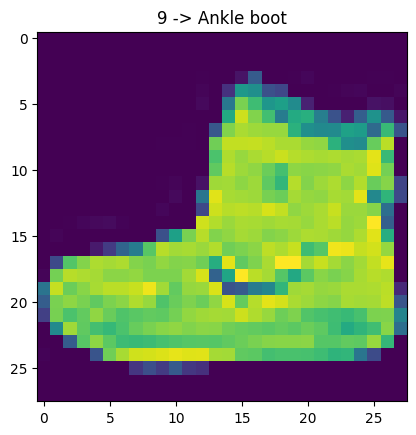

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{label} -> {class_names[label]}");


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

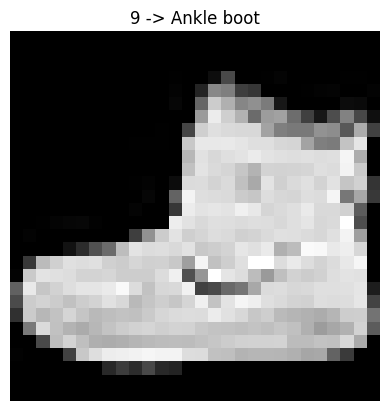

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{label} -> {class_names[label]}");
plt.axis(False)

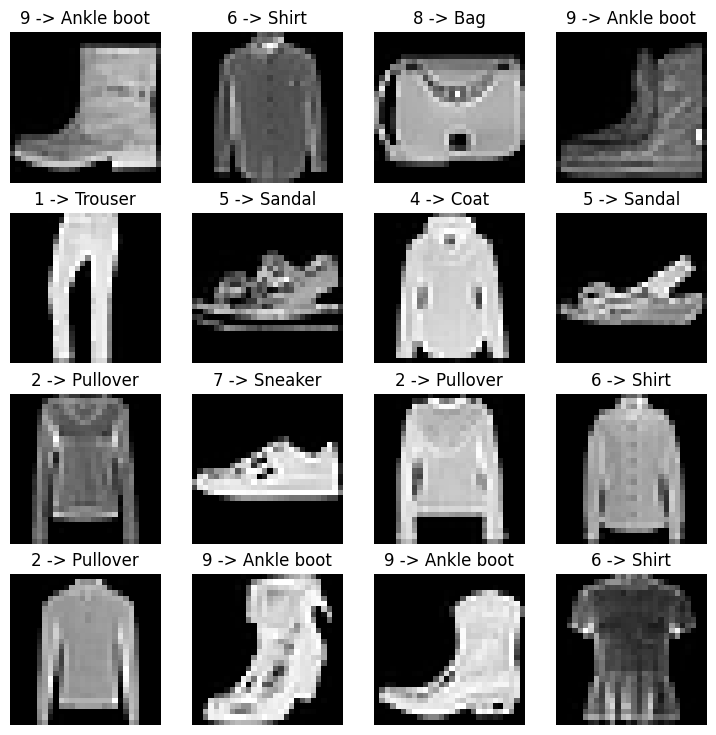

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"{label} -> {class_names[label]}");
    plt.axis(False)
    

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Dataloader
Al momento i dati sono sottoforma di PyTorch Datasets.

Quindi dobbiamo usare `DataLoader` per converttire i dataset in un iterabile Python.
Vogliamo che siano in batches. In quanto non possiamo dare in pasto milioni di immmagini, perché esploderebbe il mac.

Questo rende la computazione più efficace e di solito usiamo un **batch_size=32**
Inoltre daremo più possibilità alla nostra rete neurale di **aggiornare i gradienti** durante le epoche.

In [13]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x128646f20>,
 <torch.utils.data.dataloader.DataLoader at 0x12822ee60>)

In [14]:
# Let's checkout what we've created

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x128646f20>, <torch.utils.data.dataloader.DataLoader object at 0x12822ee60>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
# CHeck out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # [BCHW] -> [BATCH, COLOR_CHANNELS, HEIGHT, WIDTH]

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


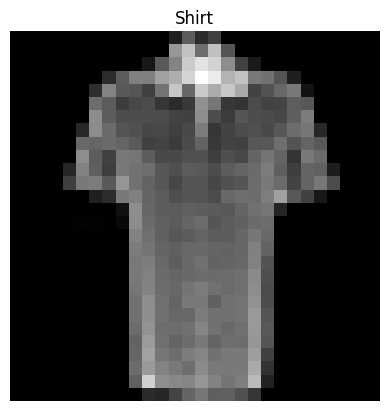

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model
Quando iniziamo a fare una serie di esperimenti di modelli, è una buona pratica inizare con un modello baseline.

Un **modello base** è un modello che proveremo a migliorare con modelli/esperimenti successivi.

- Start simply and add complexity when necessary.

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]  # x.shape => torch.Size([1, 28, 28])

# print(x.shape)

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}") # -> [color_channels, height, width]
print(f"Shape after flattening: {output.shape}")  # -> [color_channels, height * width]

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit,
                      out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

# Setup model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_unit=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss functions - visto che siamo su un problema di classificazione multi-class, useremo `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metrics - Accuracy

In [25]:
import requests
from pathlib import Path



# Download Helper functions from Learn PyTorch Repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [26]:
# Import Accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)


### 3.2 Creating a function to time our experiments

Le due cose principali di cui vogliamo tenere traccia nel Machine learning sono:
1. Model's Performance (loss and accuraty values etc.)
2. How fast it runs

In [27]:
from timeit import default_timer as timer
def print_train_time(start:float,
                    end:float,
                    device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [28]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end= end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.316700167488307e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop throug testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [29]:
!pip install tqdm

In [30]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n------")
    ## training
    train_loss = 0
    # Add a loop to loop throug the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2 . Calculatre the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss 

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # Backpropagation
        optimizer.step()

        # Print out what's happening

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    # Divide total train loss by lenght of train dataloader
    train_loss/= len(train_dataloader)

    ### Testing loop
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward Pass
            test_pred = model_0(X_test)

            # 2 Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                            end=train_time_end_on_cpu, 
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test Acc: 82.0387
Epoch 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test Acc: 83.1969
Epoch 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test Acc: 83.4265
Train time on cpu: 4.654 seconds


In [31]:
print(str(next(model_0.parameters()).device))

cpu


## 4. Function to evaluate our models results

In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device):
    """Return a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X,y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
           "model_acc": acc}

    
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader, 
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device="cpu")

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU is there is one)

In [34]:
def get_device():
    if torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# Poi usa
device = get_device()

In [35]:
print(device)

mps


In [36]:
torch.mps.is_available()

True

## 6 Model 1 (better model with non linearity)



In [37]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self,x):
        return self.layer_stack(x)

In [38]:
# Create an istance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_unit=10,
                             output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='mps', index=0)

### 6.1 setup loss an optimizer and evaluation metrics

In [39]:
# Import Accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

### 6.2 funtionizing training and evaluation/testing loops
- `train_step()` training loop
- `test_step()` testing loop

In [40]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device =device):
    """Performs a training with model trying to learn on data_laoder""" 
    train_loss, train_acc = 0,0

    model.train()
    
    for batch, (X,y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2 . Calculatre the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # from logits -> prediction labels

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # Backpropagation
        optimizer.step()

       
    
    # Divide total train loss by lenght of train dataloader
    train_loss/= len(data_loader)
    train_acc /= len(data_loader)

     # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}")
    

In [41]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""

    test_loss, test_acc = 0,0

    model.eval()

    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1))

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n ")
            

In [42]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# Set Epochs
epochs = 3

# Create optimizazion and evaluation loop using `train_step()` and for `ttest_step()`
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, 
                                            end= train_time_end_on_gpu, 
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train Acc: 61.34
Test loss: 0.95636 | Test acc: 65.00%
 
Epoch: 1
----------
Train loss: 0.78097 | Train Acc: 71.94
Test loss: 0.72611 | Test acc: 73.99%
 
Epoch: 2
----------
Train loss: 0.67040 | Train Acc: 75.94
Test loss: 0.69007 | Test acc: 74.81%
 
Train time on mps: 12.684 seconds


In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [44]:
total_train_time_model_0

4.654251084008138

In [45]:
total_train_time_model_1

12.684484375000466

In [46]:
# Get model_1 result dictionary
# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1, 
                             data_loader=test_dataloader, 
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device="mps")

model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6900655031204224,
 'model_acc': 74.810303514377}

## Model 2 Building a convolutional Neural Network (CNN)

### Struttura e funzionamento:
Le CNN sono composte da diversi strati specializzati:

- Strati convoluzionali: applicano filtri (kernel) all'immagine per rilevare caratteristiche come bordi, texture e forme
- Strati di pooling: riducono le dimensioni dei dati mantenendo le informazioni più importanti
- Strati completamente connessi: nelle fasi finali per la classificazione

### Come funzionano:
I filtri convoluzionali "scorrono" sull'immagine catturando pattern locali. Nei primi strati rilevano caratteristiche semplici come linee e bordi, mentre negli strati più profondi riconoscono forme complesse e oggetti completi.
### Applicazioni principali:
Le CNN sono ampiamente utilizzate nel riconoscimento di immagini, diagnosi medica tramite imaging, veicoli autonomi, riconoscimento facciale, e analisi di documenti. Sono alla base di molte tecnologie di computer vision moderne.
La loro efficacia deriva dalla capacità di apprendere automaticamente le caratteristiche rilevanti dalle immagini, senza dover specificare manualmente quali pattern cercare.

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements

let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![](image/03-cnn-explainer-model.png)


### Different model

| **Problem type** | **Model to use (generally)** | **Code example** |
|--------------|--------------------------|--------------|
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | `sklearn.ensemble`, XGBoost library| 
|Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | `torchvision.models`, HuggingFace Transformers|

In [147]:
# Create a convolutional Neural Network
class FashionMNISTMODELV2(nn.Module):
    """
    Model architecture that replicate TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x
        

In [148]:
torch.manual_seed(42)

model_2 = FashionMNISTMODELV2(input_shape=1, # one colore
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [149]:
print(model_2.classifier)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=490, out_features=10, bias=True)
)


In [150]:
print(f"Dimensioni di image_mps : {image_mps.shape}")

Dimensioni di image_mps : torch.Size([1, 1, 28, 28])


### 7.1 Stepping Through `nn.Conv2d()`
![](image/03-conv2d-layer.gif)

Il layer `Conv2d()` è un livello di convoluzione bidimensionale, uno dei componenti fondamentali delle reti neurali convoluzionali (CNN) per l'elaborazione di immagini.

**Cosa fa:**
Applica filtri (kernel) scorrevoli su un'immagine per estrarre caratteristiche locali come bordi, texture o pattern. Il filtro "scorre" sull'immagine moltiplicando i valori dei pixel per i pesi del kernel e sommando i risultati.

**Parametri principali:**
- `in_channels`: numero di canali in input (es. 3 per RGB)
- `out_channels`: numero di filtri/feature maps in output
- `kernel_size`: dimensione del filtro (es. 3x3, 5x5)
- `stride`: passo con cui il filtro scorre (default 1)
- `padding`: pixel aggiunti ai bordi per controllare le dimensioni output

**Esempio pratico:**
```python
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
```

Questo layer prende un'immagine RGB (3 canali), applica 64 filtri diversi di dimensione 3x3, producendo 64 feature maps che evidenziano diverse caratteristiche dell'immagine originale. È così che le CNN "imparano" a riconoscere pattern sempre più complessi nei dati visivi.

In [151]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))

test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [152]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10, # hidden layer
                      kernel_size=(3,3), # filtro 3x3 
                      stride=1, # passo di scorrimento del filtro
                       padding=1) # pixel aggiunti ai bordi

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [153]:
test_image.shape

torch.Size([3, 64, 64])

In [154]:
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping though `nn.MaxPool2s()`

Il layer `MaxPool2d()` è un livello di pooling che **riduce le dimensioni spaziali delle feature maps mantenendo le informazioni più importanti**.

**Cosa fa:**
Divide l'immagine in regioni non sovrapposte e per ogni regione seleziona solo il valore massimo. Questo riduce la risoluzione ma preserva le caratteristiche più forti, rendendo la rete più robusta a piccole traslazioni dell'oggetto.

**Parametri principali:**
- `kernel_size`: dimensione della finestra di pooling (es. 2x2)
- `stride`: passo con cui la finestra scorre (default = kernel_size)
- `padding`: padding aggiunto ai bordi (default 0)

**Esempio pratico:**
```python
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
```

Se hai una feature map 64x64, dopo questo layer diventa 32x32. Da una regione 2x2 come:
```
[1, 3]
[2, 8]
```
mantiene solo il valore massimo: `8`.

**Vantaggi:**
- Riduce il numero di parametri e la complessità computazionale
- Fornisce invarianza alla traslazione
- Aiuta a prevenire l'overfitting
- Permette alla rete di "vedere" aree più ampie dell'immagine nei layer successivi

È tipicamente usato dopo i layer convoluzionali per creare una gerarchia di rappresentazioni sempre più astratte e compatte.

![](image/03-conv-net-as-compression.png)

In [155]:
test_image.shape

torch.Size([3, 64, 64])

![](image/03_max_pooling.png)

In [156]:
print(f"TEst image shape: {test_image.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool(): {test_image_through_conv_and_max_pool.shape}")



TEst image shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool(): torch.Size([10, 32, 32])


In [157]:
torch.manual_seed(42)
# Create a random tensor with a similar numer of dimensions of our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"\nRandom tensor shape:\n {random_tensor.shape}")
# Max pool
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"\nMax pool tensor shape:\n {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])

Max pool tensor shape:
 torch.Size([1, 1, 1, 1])


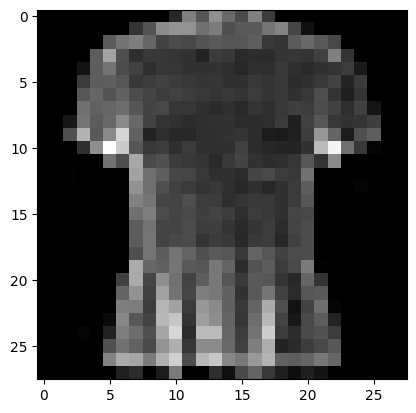

In [158]:
plt.imshow(image.squeeze(), cmap='gray')

In [159]:
print(f"Modello su: {next(model_2.parameters()).device}")
print(f"Input su: {image.device}")

Modello su: mps:0
Input su: cpu


In [160]:
image_mps = image.unsqueeze(1).to(device)

In [161]:
image_mps.shape

torch.Size([1, 1, 28, 28])

In [162]:
model_2(image_mps)

tensor([[ 0.0300, -0.0610,  0.0485, -0.0278, -0.0125,  0.0172, -0.0056, -0.0121,
          0.0243,  0.0095]], device='mps:0', grad_fn=<LinearBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [163]:
# Setup loss function / eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [164]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testign `model_2` using out training and test functions

In [165]:
torch.manual_seed(42)

torch.mps.manual_seed(42)


# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                            device=device
                                           )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59166 | Train Acc: 78.49
Test loss: 0.39617 | Test acc: 85.72%
 
Epoch: 1
-------
Train loss: 0.36768 | Train Acc: 86.69
Test loss: 0.35426 | Test acc: 86.92%
 
Epoch: 2
-------
Train loss: 0.32993 | Train Acc: 87.92
Test loss: 0.32604 | Test acc: 87.96%
 
Train time on mps: 34.588 seconds


In [166]:
# Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3260429799556732,
 'model_acc': 87.95926517571885}

## 8. Compare model results and training time

In [167]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.690066,74.810304
2,FashionMNISTMODELV2,0.326043,87.959265


In [168]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,4.654251
1,FashionMNISTModelV1,0.690066,74.810304,12.684484
2,FashionMNISTMODELV2,0.326043,87.959265,34.588359


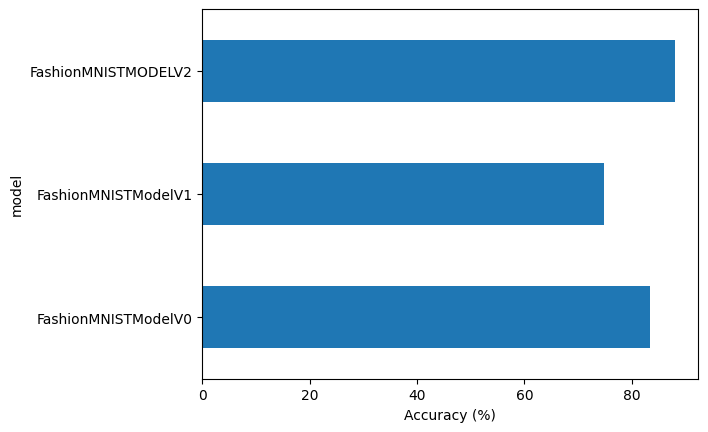

In [169]:
# Visualize our models results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model");


## 9 Make and evaluate random predictions with best model

In [171]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dim and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # get prediction prob (logis -> prediction probabilities)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred_prob off the GPU for further calculations

            pred_probs.append(pred_prob.cpu())
    # Stack the pred_probs to turn list into a tensor
    
    return torch.stack(pred_probs)

In [172]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [173]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

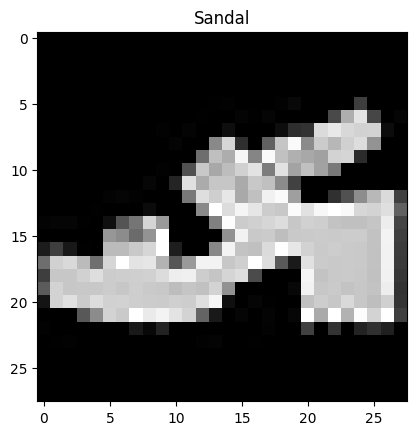

In [178]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [179]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

# view firt 2 pred prob

pred_probs[:2]

tensor([[5.8249e-08, 2.5707e-09, 1.8736e-08, 2.1719e-07, 4.7056e-10, 9.9998e-01,
         2.3244e-08, 7.7235e-06, 4.0267e-06, 5.4134e-06],
        [5.6719e-02, 6.9931e-01, 1.0223e-03, 6.7623e-02, 5.1500e-02, 6.6496e-05,
         1.2250e-01, 2.4703e-04, 8.5159e-04, 1.6021e-04]])

In [180]:
# Convert preditcion probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [181]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

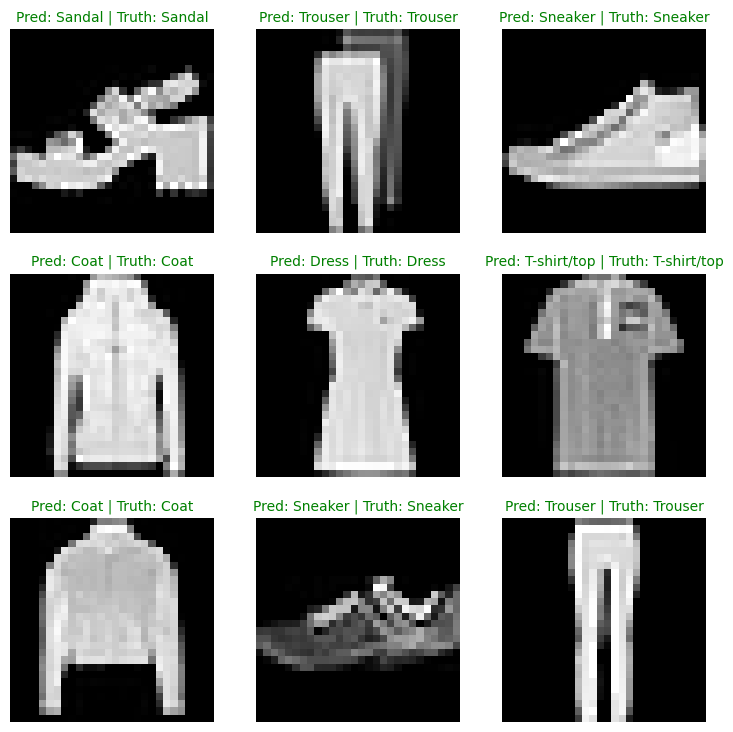

In [184]:
# Plot Predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # FInd the predictions (text form)
    pred_label = class_names[pred_classes[i]]

    # get the truth label
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality (pred truth, and change color of title text)
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)


# 10 making a confusion matrix for further prediction evaluation
1. Make pred with our trained model on the test dataset
2. Make a confunsion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confunsion_matrix()`

In [187]:
! pip install -q mlxtend

In [188]:
import mlxtend

In [191]:
# import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X,y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)

        # Turn pred from logits -> predictions proba -> pred labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [189]:
mlxtend.__version__

'0.23.4'

In [194]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [195]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

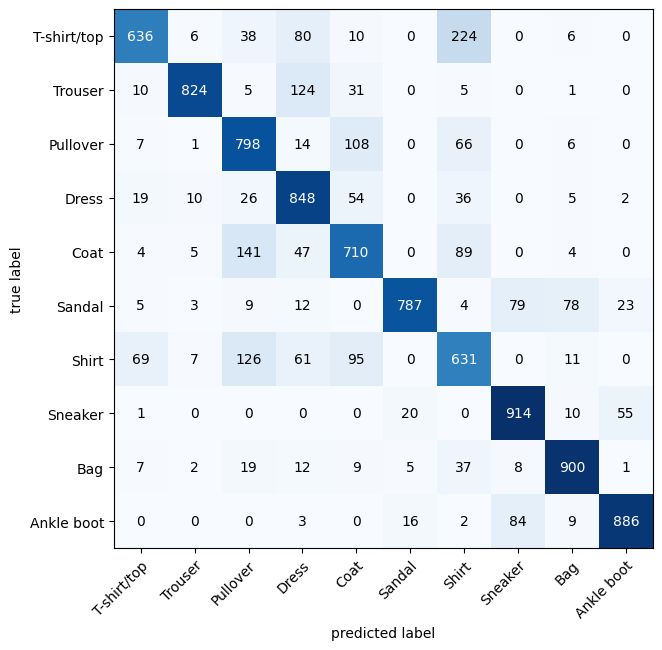

In [197]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2 setup confusion istance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3 plt the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11 Save and load best performing Model

In [199]:
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)
# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [200]:
# Create a new istance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTMODELV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


# Send the model to target device
loaded_model_2.to(device)

FashionMNISTMODELV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [201]:
model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3260429799556732,
 'model_acc': 87.95926517571885}

In [203]:
# Evaluate loaded model 
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.3260429799556732,
 'model_acc': 87.95926517571885}

In [205]:
# CHeck if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
             torch.tensor(loaded_model_2_results["model_loss"]),
             atol=1e-02)

tensor(True)

## Exercise